In [6]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Acceder al archivo CSV
dataframe = pd.read_csv('CANCERLUNG.csv', sep = ';')
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,2,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


Text(0.5, 1.0, 'Distribución de clases')

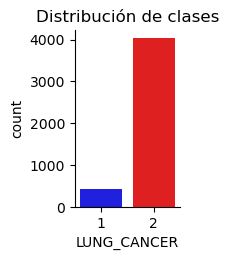

In [5]:
import seaborn as sb
sb.catplot(x='LUNG_CANCER',hue='LUNG_CANCER',data=dataframe,kind="count",height=2.5, aspect=0.8,palette={1:"blue",2:"red"},legend= False)
plt.title("Distribución de clases")

In [8]:
#Definir los valores para entrenar al algoritmo
y=dataframe['LUNG_CANCER']
x=dataframe.drop('LUNG_CANCER',axis=1)

In [9]:
#Entrenar el modelo con n_neighbors = 1
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

from sklearn.neighbors import KNeighborsClassifier
knn_mm = KNeighborsClassifier(n_neighbors=1)

knn_mm.fit(x_train,y_train)

predicciones=knn_mm.predict(x_test)

              precision    recall  f1-score   support

           1       1.00      0.95      0.97       115
           2       1.00      1.00      1.00      1222

    accuracy                           1.00      1337
   macro avg       1.00      0.97      0.99      1337
weighted avg       1.00      1.00      1.00      1337



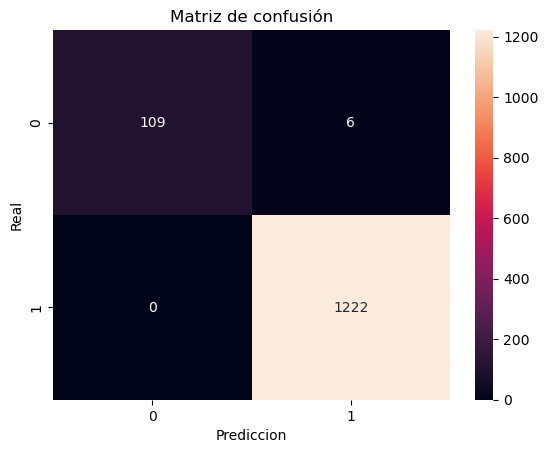

In [13]:
# Graficar la matriz de confusión e imprimir el reporte de clasificación para el análisis
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,predicciones).ravel()

sns.heatmap(confusion_matrix(y_test,predicciones), annot=True,fmt="d")
plt.title("Matriz de confusión")
plt.xlabel('Prediccion')
plt.ylabel('Real')

print(classification_report(y_test,predicciones))

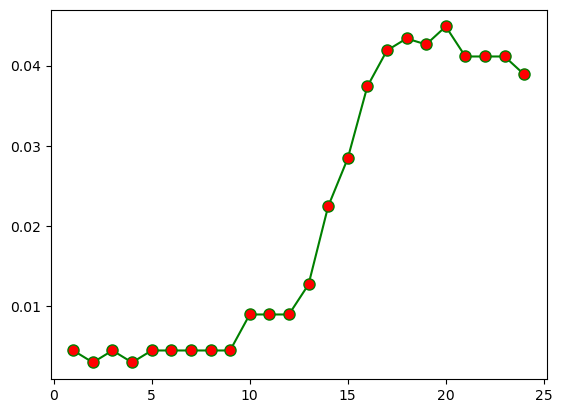

In [14]:
#Analizar tasa de error en distintos valores de n_neighbors
tasa_error = []
for i in range(1,25):
    knn_mm =KNeighborsClassifier(n_neighbors=i)
    knn_mm.fit(x_train,y_train)
    prediccion_i=knn_mm.predict(x_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

valores = range(1,25)
plt.plot(valores,tasa_error,color='green',marker='o', markerfacecolor='red',markersize='8')

In [10]:
# Entrenamos el modelo con el n_neighbors óptimo
knn_mm = KNeighborsClassifier(n_neighbors=2)
knn_mm.fit(x_train,y_train)
predicciones=knn_mm.predict(x_test)

              precision    recall  f1-score   support

     Benigno       0.97      1.00      0.98       115
     Maligno       1.00      1.00      1.00      1222

    accuracy                           1.00      1337
   macro avg       0.98      1.00      0.99      1337
weighted avg       1.00      1.00      1.00      1337



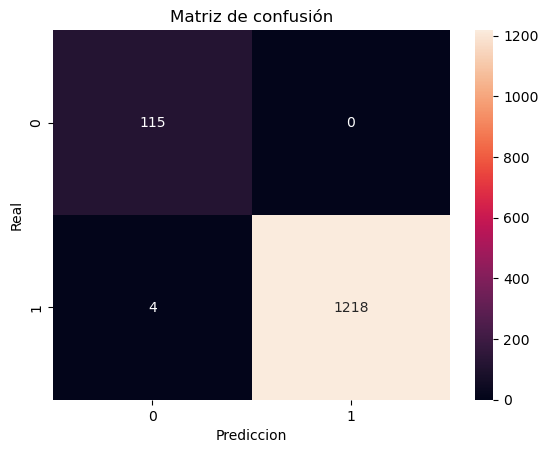

In [16]:
# Volver a graficar la matriz e imprimir el reporte para comprobar su precisión
sns.heatmap(confusion_matrix(y_test,predicciones), annot=True,fmt="d")
plt.title("Matriz de confusión")
plt.xlabel('Prediccion')
plt.ylabel('Real')

print(classification_report(y_test,predicciones,target_names=['Benigno','Maligno']))

In [12]:
print(knn_mm.predict([[1,69,1,2,2,1,1,2,1,2,2,2,2,2,2]]))
print(knn_mm.predict_proba([[1,69,1,2,2,1,1,2,1,2,2,2,2,2,2]]))
print(knn_mm.predict([[2,59,1,1,1,2,1,2,1,2,1,2,2,1,2]]))
print(knn_mm.predict_proba([[2,59,1,1,1,2,1,2,1,2,1,2,2,1,2]]))
print(knn_mm.predict([[2,63,1,2,1,1,1,1,1,2,1,2,2,1,1]]))
print(knn_mm.predict_proba([[2,63,1,2,1,1,1,1,1,2,1,2,2,1,1]]))
print(knn_mm.predict([[1,74,2,1,1,1,2,2,2,1,1,1,2,2,2]]))
print(knn_mm.predict_proba([[1,74,2,1,1,1,2,2,2,1,1,1,2,2,2]]))

[2]
[[0. 1.]]
[1]
[[1. 0.]]
[1]
[[1. 0.]]
[2]
[[0. 1.]]


C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Alumno\anaconda3\Lib\site-packages\sklearn\base.py:493: 